Loading Spotify dataset...
Dataset loaded successfully: 114000 rows and 21 columns.

Data preview:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic        

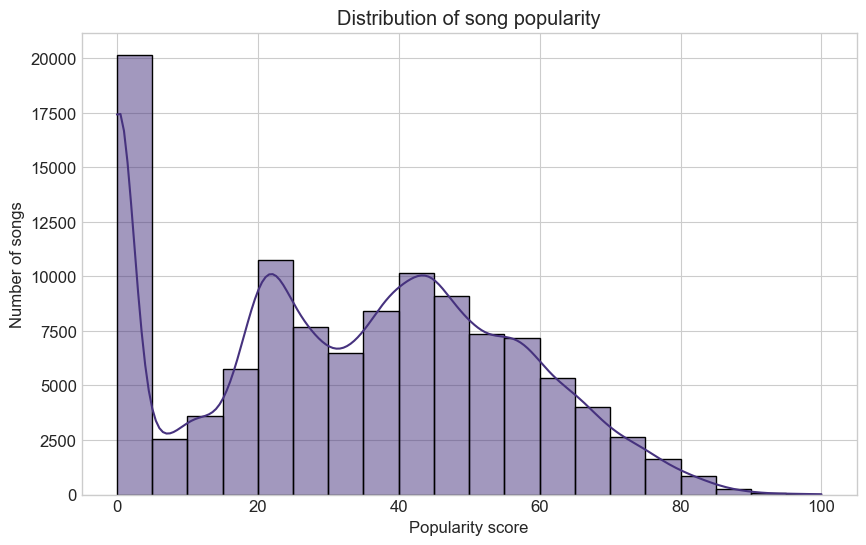

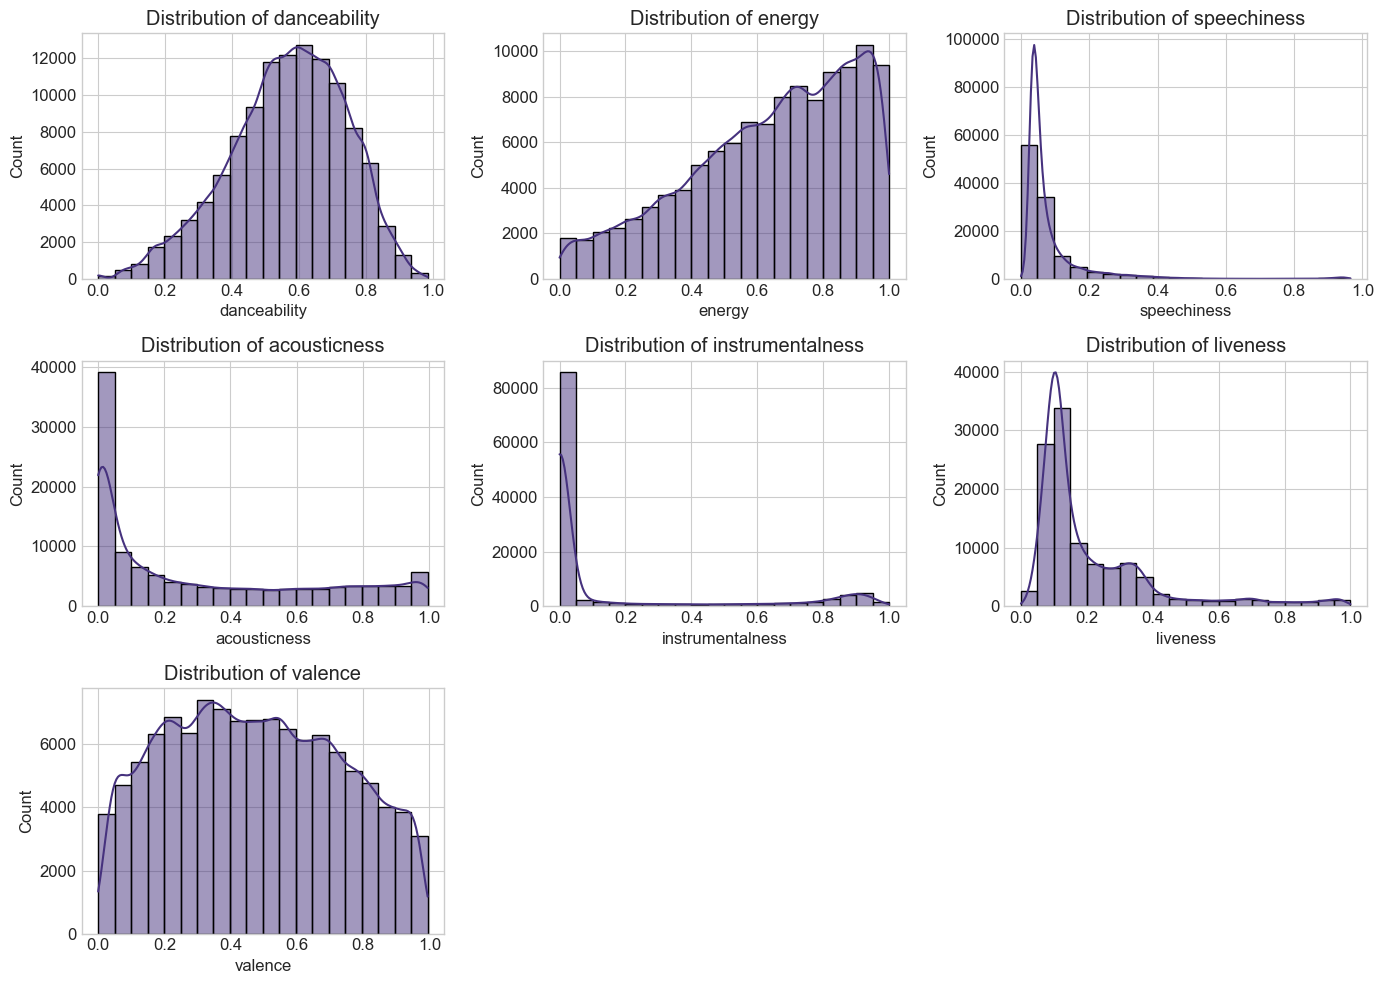

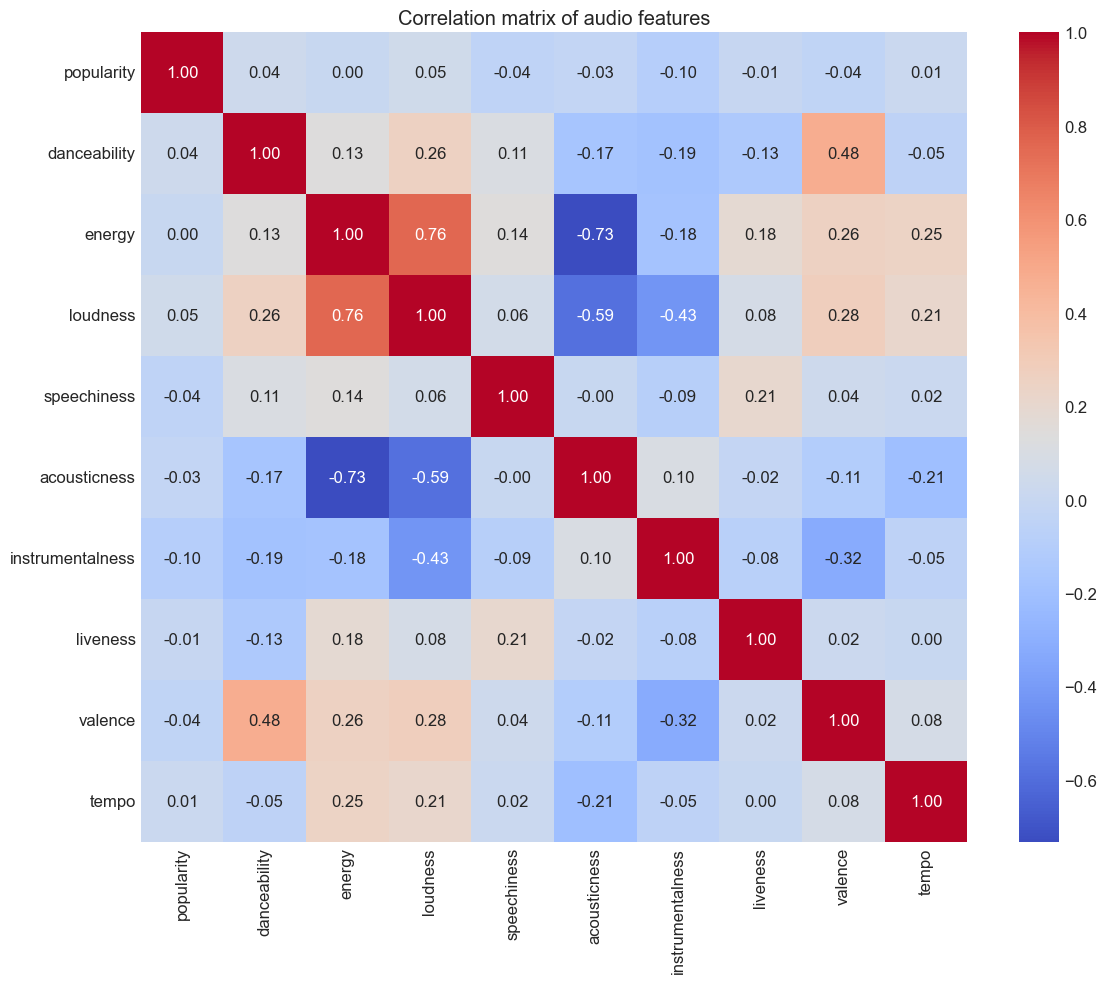

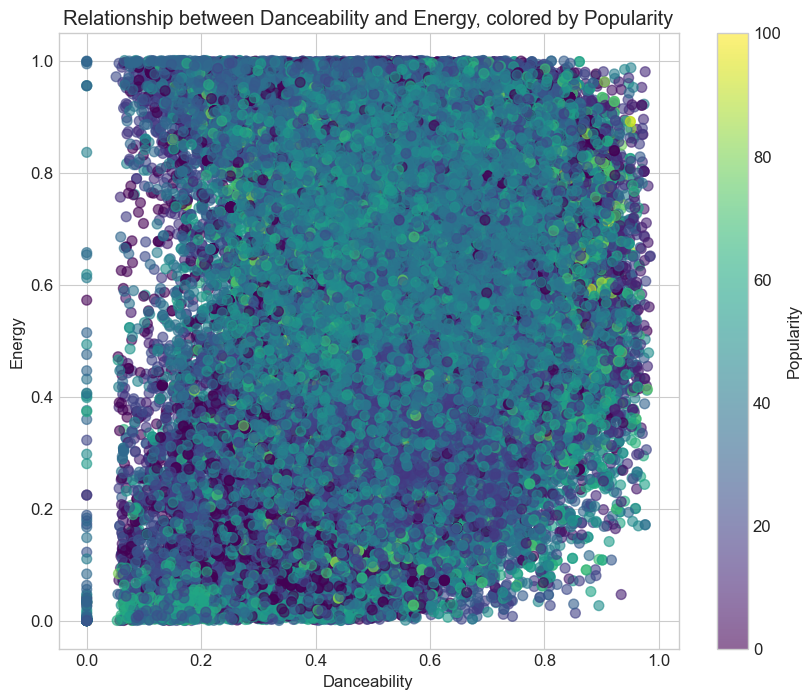

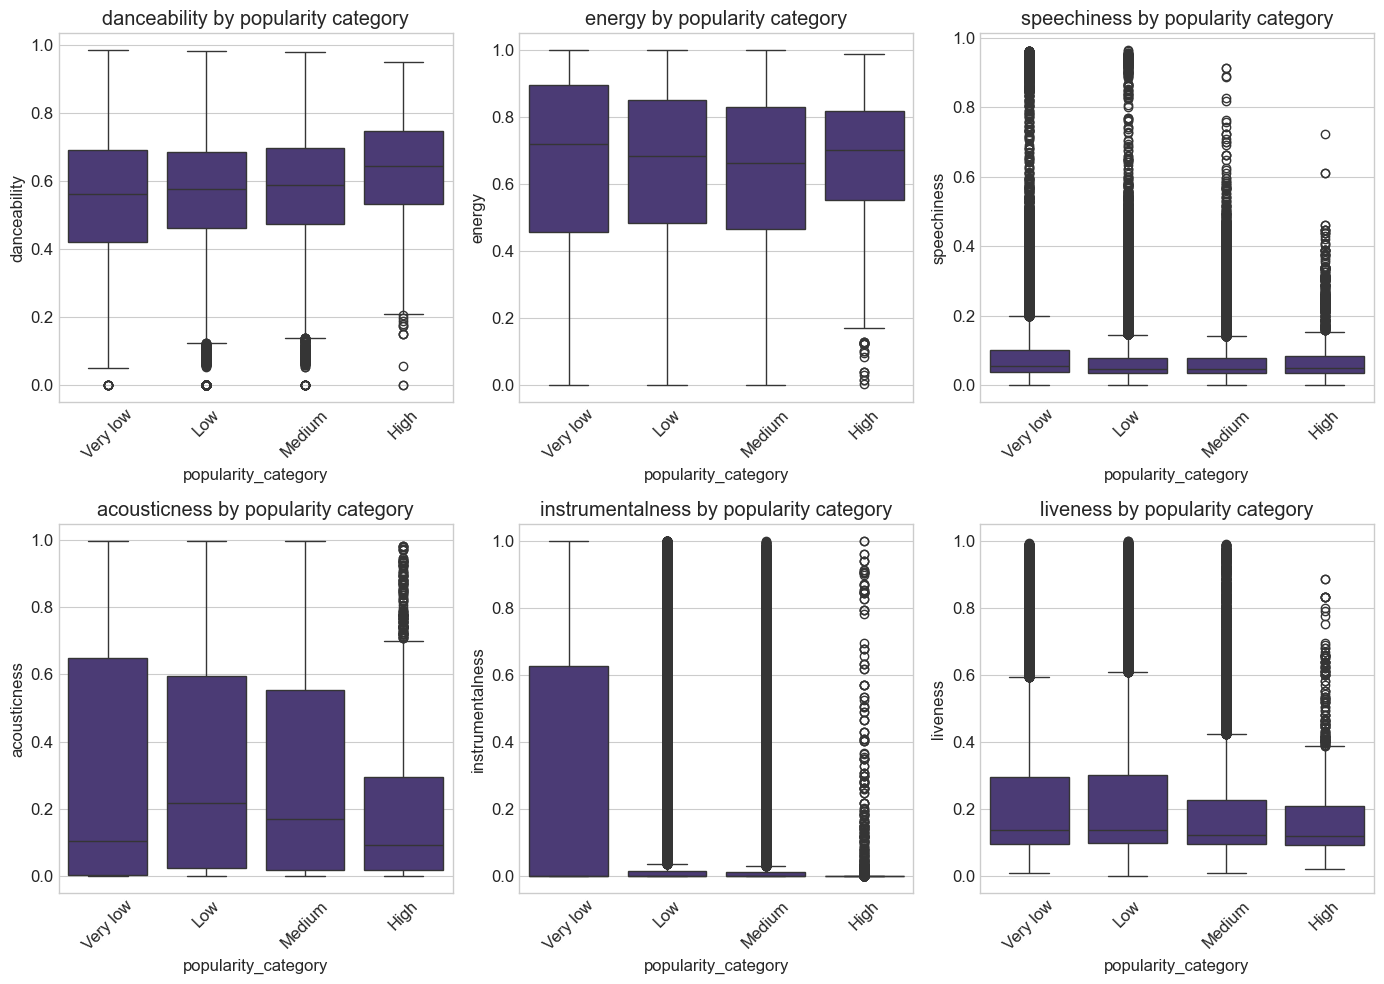


Data preparation complete. Exploratory analysis successfully performed.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# configuration of the graphics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Loading Spotify dataset...")

# URL to download the dataset
spotify_dataset_url = r"archive\dataset.csv"

# loading the dataset
try:
    df = pd.read_csv(spotify_dataset_url)
    print(f"Dataset loaded successfully: {df.shape[0]} rows and {df.shape[1]} columns.")
except Exception as e:
    print(f"Error loading the dataset: {e}")

# display the first rows
print("\nData preview:")
print(df.head())

# information about the dataset
print("\nDataset information:")
print(df.info())

# descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())

# check for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# if no missing values are found
if missing_values.sum() == 0:
    print("No missing values found.")

# exploring music genres
print("\nDistribution of music genres:")
if 'track_genre' in df.columns:
    print(df['track_genre'].value_counts().head(10))
else:
    print("The 'track_genre' column is not present in the dataset.")

# exploring popularity
print("\nPopularity statistics:")
print(df['popularity'].describe())

# visualizing popularity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of song popularity')
plt.xlabel('Popularity score')
plt.ylabel('Number of songs')
plt.savefig('popularity_distribution.png')
plt.show()
plt.close()

# visualizing main audio features
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.savefig('audio_features_distribution.png')
plt.show()
plt.close()

# correlation matrix between audio features
correlation_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(12, 10))
correlation_matrix = df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix of audio features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

# relationship between danceability and energy by popularity
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['danceability'], df['energy'], 
                      c=df['popularity'], cmap='viridis', 
                      alpha=0.6, s=50)
plt.colorbar(scatter, label='Popularity')
plt.title('Relationship between Danceability and Energy, colored by Popularity')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.savefig('danceability_energy_scatter.png')
plt.show()
plt.close()

# boxplot of audio features by popularity (categorized)
# dividing popularity into categories
popularity_bins = [0, 25, 50, 75, 100]
popularity_labels = ['Very low', 'Low', 'Medium', 'High']
df['popularity_category'] = pd.cut(df['popularity'], bins=popularity_bins, labels=popularity_labels)

plt.figure(figsize=(14, 10))
for i, feature in enumerate(audio_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='popularity_category', y=feature, data=df)
    plt.title(f'{feature} by popularity category')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.savefig('audio_features_by_popularity.png')
plt.show()
plt.close()

print("\nData preparation complete. Exploratory analysis successfully performed.")